In [1]:
%matplotlib inline

# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.plotly as py
import cufflinks as cf
from ipywidgets import *  
from IPython.display import display  
#from IPython.html import widgets
from pivottablejs import pivot_ui
from plotly.graph_objs import *
from plotly.widgets import *

# Set default plot style
#plt.style.use('ggplot')

C:\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

C:\Anaconda3\lib\site-packages\IPython\utils\traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
# Calculates the total value contained in the tailings
# based on the total tonnage, mineral grades, and spot prices
#
# gold_grade: grade of gold left in tailings, estimated in ppm, g/t
# gold_price: spot price of gold, in USD/Oz
#
# tungsten_grade: grade of tungsten (WO3) in the tailings, estimated ppm, g/t
# tungsten_price: spot price of tungsten (WO3), in USD/metric ton unit of WO3
#
# returns Full value in tailings, in $Million US
#
def CalculateTailingValue_Interactive(gold_grade:widgets.FloatText(value=0.3, description='Remaining Gold Grade (in ppm, t/g)'),
                          tungsten_grade:widgets.FloatText(value=300, description='Remaining Tungsten Grade (in ppm, t/g)'),
                          gold_price:widgets.FloatSlider(min=100, max=2000, value=1000,
                                                         description='Gold Spot Price ($US/Oz)')=1000,
                          tungsten_price:widgets.FloatSlider(min=50, max=500, value=320,
                                                             description='WO3 Spot Price ($US/tonne)')=320,
                          in_millions:(True)=True):
    
    ValueAUPerTonneTailings = gold_grade * gold_price/31.1               # In USD/t
    ValueWPerTonneTailings  = tungsten_grade * tungsten_price/7.93/1000  # In USD/t
    CombinedValuePerTonne = ValueAUPerTonneTailings + ValueWPerTonneTailings
    
    FullValue = TailingTonnage * CombinedValuePerTonne    # In $US
    if (in_millions):
        FullValue = FullValue / 1000000                       # In $M US
    
    df = BuildData(FullValue);
    return PlotData(df);

In [3]:
# Calculates the total value contained in the tailings
# based on the total tonnage, mineral grades, and spot prices
#
# gold_grade: grade of gold left in tailings, estimated in ppm, g/t
# gold_price: spot price of gold, in USD/Oz
#
# tungsten_grade: grade of tungsten (WO3) in the tailings, estimated ppm, g/t
# tungsten_price: spot price of tungsten (WO3), in USD/metric ton unit of WO3
#
# returns Full value in tailings, in $Million US
#
def CalculateTailingValue(gold_grade,
                          tungsten_grade,
                          gold_price=1000,
                          tungsten_price=320,
                          in_millions=True):
    
    ValueAUPerTonneTailings = gold_grade * gold_price/31.1               # In USD/t
    ValueWPerTonneTailings  = tungsten_grade * tungsten_price/7.93/1000  # In USD/t
    CombinedValuePerTonne = ValueAUPerTonneTailings + ValueWPerTonneTailings
    
    FullValue = TailingTonnage * CombinedValuePerTonne    # In $US
    if (in_millions):
        FullValue = FullValue / 1000000                       # In $M US
    
    return FullValue;

In [4]:
# Creates a dataset that contains a the tailing value based on a fractional amount
# of the tailings processed, and a fraction recovery amount.
#
# returns DataFrame of all tailing values based on fraction reprocessed and recovered.
#
def BuildData(TailingsValue):
    FractionReprocessed = pd.DataFrame({'Reprocessed':[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]})
    FractionRecovered = pd.DataFrame({'Recovered':[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]})


    df = pd.DataFrame({'Reprocessed':np.zeros(0).astype(float),
                   'Recovered':np.zeros(0).astype(float),
                   'Value':np.zeros(0).astype(float)})

    rowindex = 0

    for i in FractionReprocessed['Reprocessed']:
        for j in FractionRecovered['Recovered']:
            df.loc[rowindex, 'Reprocessed'] = i
            df.loc[rowindex, 'Recovered'] = j
            df.loc[rowindex, 'Value'] = TailingsValue * i * j
            rowindex = rowindex + 1

    return df

In [5]:
plot_types = ['seaborn','plotly']

# Plot the results
def PlotData(df, plot_type='plotly'):
    
    if plot_type == 'seaborn':
        sns.set_style('witegrid')
        fig = sns.pointplot(x='Reprocessed', y='Value', hue='Recovered', data=df, color_palette='deep');
        sns.despine()
    elif plot_type == 'plotly':
        py.sign_in('pdh-eng', 'ncw95i0dq8')
        fig = py.iplot(
            {
                'data': [
                    {
                        'x': df[df['Recovered']==convert]['Reprocessed'],
                        'y': df[df['Recovered']==convert]['Value'],
                        'name': '{}%'.format(convert*100), 
                        'mode': 'line',
                    } for convert in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
                ],
                'layout': {
                    'xaxis': {'title': 'Fraction of tailings reprocessed', 'type': 'log'},
                    'yaxis': {'title': 'Recovered Value ($M US)'}
                }
        }, filename='Tail-Lite/TailingsValue')
        
    
    return fig;

In [6]:
# STARTING INPUTS
TailingTonnage = 55774649
MissedGoldGrade = 0.3       # Estimated ppm, g/t
UncapturedWGrade = 300      # Estimated ppm. g/t

SpotGoldPrice = 1000        # USD/Oz
SpotTungstenPrice = 320     # USD/metric ton unit of WO3
# assume 414 ppm W is equivalent to 0.5 g/t Au at these prices

In [ ]:
interact(CalculateTailingValue)

In [7]:
# Calculate total value in tailings
FullTailingsValue = CalculateTailingValue(gold_grade=MissedGoldGrade, tungsten_grade=UncapturedWGrade,
                      gold_price=SpotGoldPrice, tungsten_price=SpotTungstenPrice)

print('Full tailings value: {0:.1f}$M US'.format(FullTailingsValue))

Full tailings value: 1213.2$M US


In [8]:
df = BuildData(FullTailingsValue)
fig = PlotData(df);

In [ ]:
#g = GraphWidget('http://plot.ly/~pdh-eng/Tail-Lite/TailingsValue')
g = GraphWidget('https://plot.ly/~pdh-eng/20/recovered-value-m-us-vs-fraction-of-tailings-reprocessed/')

def UpdateChart(_):
    # first calculate the updated tailings value based on the inputs
    TailingsValue = CalculateTailingValue(gold_grade=gold_grade_input.value,
                                          gold_price=gold_price_slider.value,
                                          tungsten_grade=tungsten_grade_input.value,
                                          tungsten_price=tungsten_price_slider.value)
    print (TailingsValue)
    df = BuildData(TailingsValue)
    
    # plot the data and interact with it.
    g.restyle({'x':[[]], 'y':[[]]})
    '''
    g.add_traces({
                        'x': df[df['Recovered']==convert]['Reprocessed'],
                        'y': df[df['Recovered']==convert]['Value'],
                        'name': '{}%'.format(convert*100), 
                        'mode': 'line',
                    } for convert in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5])
    '''
    print('Got here')

In [ ]:
# prepare the inputs widgets

# text inputs for grade levels
gold_label = widgets.Text('Remaining Gold Grade (in ppm, t/g)')
gold_label.border_style = 'none'
gold_label.disabled = True

tungsten_label = widgets.Text('Remaining Tungsten Grade (in ppm, t/g)')
tungsten_label.border_style = 'none'
tungsten_label.disabled = True

# text inputs for grade levels
gold_grade_input = widgets.FloatText(value=0.3)      #, description='Remaining Gold Grade (in ppm, t/g)')
tungsten_grade_input = widgets.FloatText(value=300)  #, description='Remaining Tungsten Grade (in ppm, t/g)')

hbox1 = widgets.HBox([gold_label, gold_grade_input,tungsten_label, tungsten_grade_input])

# slider inputs for spot prices
gold_price_slider = widgets.FloatSlider(min=100, max=2000, value=1000,
                                        description='Gold Spot Price ($US/Oz)') 
tungsten_price_slider = widgets.FloatSlider(min=50, max=500, value=320,
                                            description='Tungsten Spot Price ($US/metric ton)')

# add a button to refresh the chart.
button = widgets.Button(description='Refresh Chart', background_color='lightblue')
button.on_click(UpdateChart)

# add a recovered slider
recovery_slider = widgets.FloatSlider(min=0, max=100, value=100,
                                        description='Recovery Percent')

interactions = widgets.VBox([hbox1, gold_price_slider, tungsten_price_slider, recovery_slider, button])

In [ ]:
display(vbox)
#display(fig)

In [ ]:
layout = Layout(yaxis=YAxis(autorange='reversed'), width=500, showlegend=False)

g.relayout(layout)

In [ ]:
g.restyle({'x':[[]], 'y':[[]]})

In [ ]:
print(df.head())

In [ ]:
g.add_traces({
                'data': [
                    {
                        'x': df[df['Recovered']==convert]['Reprocessed'],
                        'y': df[df['Recovered']==convert]['Value'],
                        'name': '{}%'.format(convert*100), 
                        'mode': 'line',
                    } for convert in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
                ]})

In [ ]:
display(g)

In [ ]:
hbox.align = 'end'

In [ ]:
help(display)

In [ ]:
help(plt.style)

In [47]:
def CreatePlot():
    fig, ax = plt.subplots(1,1)
    plt.xlabel('Fraction of tailings reprocessed', size=14);
    plt.ylabel('Tailings Value (in $M US)', size=14);
    plt.title('Tailings Value', size=18);
    return ax

In [55]:
def UpdatePlot(ax, recovered=1.0):
    ax.plot(df[df['Recovered'] == recovered]['Reprocessed'], df[df['Recovered'] == recovered]['Value']);
    plt.draw()

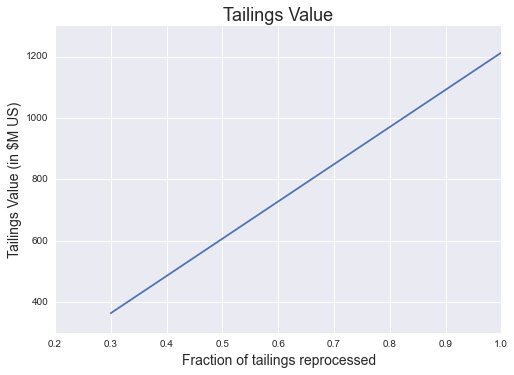

In [56]:
ax = CreatePlot()
UpdatePlot(ax, 1.0)

In [58]:
UpdatePlot(ax, 0.5)
plt.show()

[ 0.5  0.6  0.7  0.8  0.9  1. ]


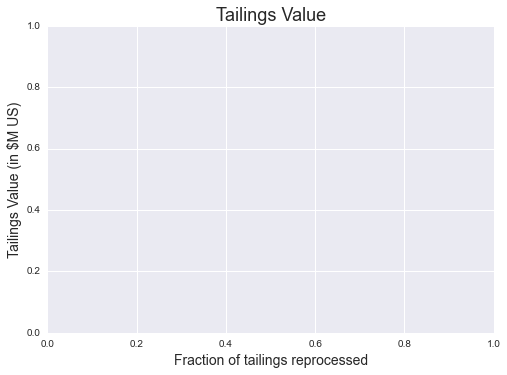

[2, 5, 6, 3, 6, 7]


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



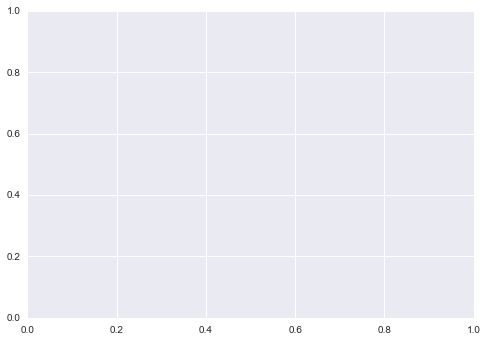

In [82]:
#preparing the plot 
data = pd.DataFrame()
x = np.arange(0.5, 1.01, 0.1)
print(x)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('Fraction of tailings reprocessed', size=14);
plt.ylabel('Tailings Value (in $M US)', size=14);
plt.title('Tailings Value', size=18);

#add button that updates the graph
button = widgets.Button(description="Update the graph")
display(button)

def AppendData(_):
    text = 'test'
    values = [2, 5, 6, 3, 6, 7]
    print(values)
    data[text] = values
    data[text] = data[text].astype(float)
    ax.plot(x, data[text]) #, label=text)
    plt.legend()
    plt.draw()
    
#function to deal with the checkbox update button       
def on_button_clicked(b):  
    plt.legend()
    plt.draw()
    
button.on_click(AppendData)  
plt.show()  


In [83]:
print(data)

   test
0     2
1     5
2     6
3     3
4     6
5     7


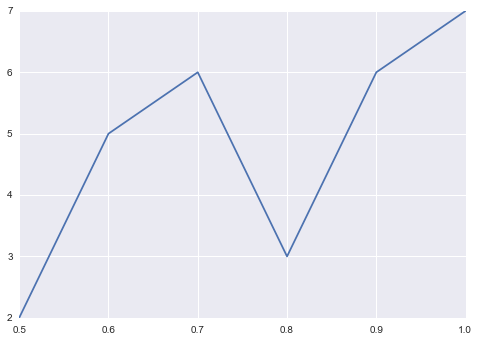

In [84]:
plt.plot(x, data['test'])

In [63]:
def AppendData(text, values):
    data[text] = values
    data[text] = data[text].astype(float)
    plots[text], = ax.plot(x, data[text], label=text)
    plt.legend()
    plt.draw()

In [ ]:
values = [2, 5, 6, 3, 6, 7, 2]


In [73]:
print (x)

[]


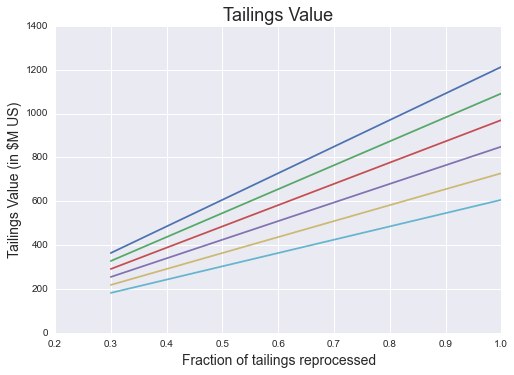

In [15]:

plt.figure()

for convert in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]:
    plt.plot(df[df['Recovered'] == convert]['Reprocessed'], df[df['Recovered'] == convert]['Value'])
    
plt.xlabel('Fraction of tailings reprocessed', size=14);
plt.ylabel('Tailings Value (in $M US)', size=14);
plt.title('Tailings Value', size=18);

In [ ]:
print(gold_price.value)

In [ ]:
plt.plot([1,2,3,4]);
plt.ylabel('some numbers');

In [ ]:
def test_ploting(a):
    fig, ax = plt.subplots(figsize=(4,3), subplot_kw={'axisbg':'#EEEEEE', 'axisbelow':True})
    x = np.linspace(0, 10, 1000) * a
    ax.plot(x);
    plt.ylabel('some numbers');
    
    return fig #plt.show()

In [ ]:
#from ipywidgets import StaticInteract

gui1 = interactive(test_ploting, a=tungsten_price_slider)
display(gui1)
#hbox.on_displayed(lambda _: f(**i.kwargs))
#display(widgets.FloatSlider(min=100, max=2000, value=1000, description='Gold Spot Price ($US/Oz)', orientation='vertical'))

In [ ]:
hbox = widgets.HBox([gold_grade_input, tungsten_grade_input])
#container.children=[gold_grade_input, tungsten_grade_input]
display(hbox)
i
hbox.on_displayed(lambda _: f(**i.kwargs))

In [ ]:





display(gold_price_slider)

plt.plot([1,2,3,4]);
plt.ylabel('some numbers');
plt.show()

display(tungsten_price_slider)

In [ ]:
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def testplot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

In [ ]:
from ipywidgets import *

interact(testplot, amplitude=widgets.FloatSlider(min=0.1, max=1.0, step=0.1), color=widgets.RadioButtons(options=['blue', 'green', 'red']))

In [ ]:
help(widgets.RadioButtons)